In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
data = pd.read_csv("merged_df.csv")
data.sample(10)

,id,ts,platform,ms_played,track_name,artist_name,album_name_x,reason_start,reason_end,shuffle,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
97113,5WPY4ONIwhHKzq02K3pV45,2021-06-07 19:42:16,android,178453,Disappear - 2009 Remaster,Madness,Absolutely,trackdone,trackdone,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81947,7iTjGs5z7opNGCXyurs0Q7,2020-11-18 19:32:12,android,553,Bad Boy - Remastered 2009,The Beatles,Past Masters,fwdbtn,fwdbtn,True,...,0,-8.512,1,0.0431,0.19900,0.000000,0.1780,0.878,134.640,140600.0
117605,4gphxUgq0JSFv2BCLhNDiE,2022-07-17 02:07:32,android,4384,Jailhouse Rock,Elvis Presley,Elvis' Golden Records,playbtn,fwdbtn,True,...,10,-9.538,0,0.0755,0.41000,0.000002,0.0715,0.915,167.396,146480.0
121857,1VuBmEauSZywQVtqbxNqka,2022-10-24 02:37:37,android,246400,Beautiful Day,U2,All That You Can't Leave Behind,trackdone,trackdone,True,...,2,-6.495,1,0.0499,0.01400,0.001360,0.3600,0.454,136.279,246400.0
109380,2mdkcujPED7xhV2MTtjYnD,2022-01-27 17:49:45,android,229773,BRIGHTSIDE,The Lumineers,BRIGHTSIDE,trackdone,trackdone,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64487,66Xoy2shVLpqTMvcziDCUy,2020-02-22 11:22:48,android,130333,Hotel Yorba,The White Stripes,White Blood Cells,trackdone,trackdone,False,...,7,-2.647,1,0.0949,0.45400,0.000000,0.0755,0.764,194.638,130333.0
52769,2t2gZb03AlCSlBzbWeeHsM,2019-07-05 12:42:00,android,18025,Take It Away - Remixed 2015,Paul McCartney,Tug Of War,clickrow,endplay,False,...,2,-8.954,1,0.0368,0.00814,0.000051,0.0755,0.928,134.875,256053.0
92671,4pFrn7MBtpwXlsyO5CbCj2,2021-04-16 06:56:17,android,1242,Por Tu Maldito Amor,Vicente Fernández,Por Tu Maldito Amor,fwdbtn,fwdbtn,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34439,0SaEmR2rdtfsZawPjMYkWg,2018-01-19 16:38:27,android,2224,Put Your Money on Me,Arcade Fire,Everything Now,fwdbtn,fwdbtn,True,...,7,-6.484,1,0.0308,0.54100,0.020100,0.7520,0.645,123.067,353240.0
60356,2EMAivXu3DdUtYgWMTCR0e,2019-11-05 22:19:13,android,164826,(Remember the Days of the) Old Schoolyard,Yusuf / Cat Stevens,Izitso,trackdone,trackdone,True,...,10,-8.684,1,0.0495,0.48500,0.000000,0.5650,0.610,146.185,164827.0


In [30]:
data.columns.to_list()

['id',
 'ts',
 'platform',
 'ms_played',
 'track_name',
 'artist_name',
 'album_name_x',
 'reason_start',
 'reason_end',
 'shuffle',
 'skipped',
 'time_window',
 'name',
 'album_name_y',
 'artists',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']

In [ ]:
# Define the order of windows
time_order = [
    '12AM–3AM',
    '3AM–6AM',
    '6AM–9AM',
    '9AM–12PM',
    '12PM–3PM',
    '3PM–6PM',
    '6PM–9PM',
    '9PM–12AM'
]

# Create mapping dictionary: 12AM–3AM = 0, 3AM–6AM = 1, etc.
time_mapping = {label: i for i, label in enumerate(time_order)}

data['time_window_num'] = data['time_window'].map(time_mapping)
print(data[['time_window', 'time_window_num']].head(10))


  time_window  time_window_num
0    12AM–3AM                0
1    12AM–3AM                0
2    12AM–3AM                0
3    12AM–3AM                0
4     3AM–6AM                1
5     3AM–6AM                1
6     3AM–6AM                1
7     3AM–6AM                1
8     3AM–6AM                1
9     3AM–6AM                1


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Define columns and num_clusters to include in this run
COLUMNS_TO_INCLUDE = ['time_window_num', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'tempo', 'duration_ms']
n_clusters = 5

X = data[COLUMNS_TO_INCLUDE].copy()
X = X.dropna()
data = data.loc[X.index].copy()

# Scale features just to be safe
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use KMeans()
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
data['cluster'] = kmeans.fit_predict(X_scaled)

# Examine results
print("Cluster centroids (standardized):")
print(pd.DataFrame(kmeans.cluster_centers_, columns=COLUMNS_TO_INCLUDE))
print("\n")
print("Cluster counts:")
print(data['cluster'].value_counts())

Cluster centroids (standardized):
   time_window_num    energy  speechiness  acousticness  instrumentalness  \
0         0.057989 -1.144650    -0.220747      1.257741         -0.240003   
1         0.907843  0.454885    -0.111431     -0.524296         -0.239696   
2         0.019032  0.057093    -0.203577     -0.082009          3.464215   
3        -0.041923  0.204125     4.578547      0.202395         -0.249290   
4        -1.006732  0.454777    -0.088287     -0.510376         -0.247111   

      tempo  duration_ms  
0 -0.243711    -0.206158  
1  0.120202     0.054604  
2 -0.075077     0.386718  
3 -0.090551    -0.059519  
4  0.103207     0.040964  

Cluster counts:
cluster
1    31302
4    29694
0    25115
2     6227
3     2821
Name: count, dtype: int64


In [ ]:
# Silhouette score (note to self - may take a couple mins to run)
from sklearn.metrics import silhouette_score
print(silhouette_score(X_scaled, data['cluster']))

0.2180929072435229


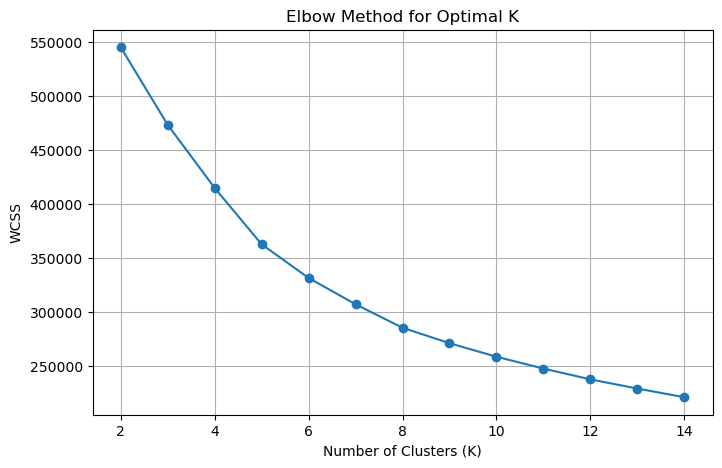

In [38]:
# Elbow Graph
import matplotlib.pyplot as plt

wcss = []
K_range = range(2, 15)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

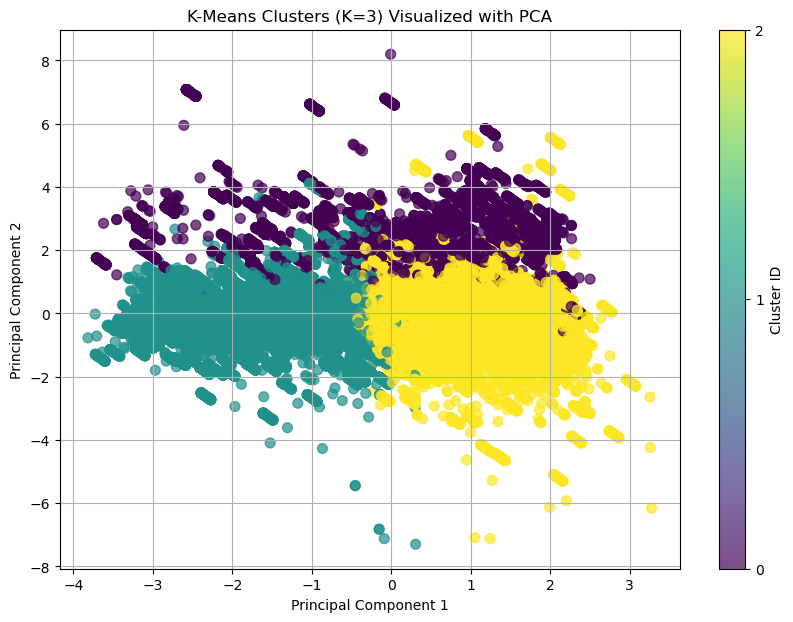

In [ ]:
# Using PCA to actually plot the clusters
from sklearn.decomposition import PCA
from scipy.stats import chi2
import numpy as np

chosen_k = 3

# Perform K-Means with the chosen_k on the scaled data (same as above)
kmeans_final = KMeans(n_clusters=chosen_k, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_scaled)

# Perform PCA to reduce data to 2 dimensions for plotting - use sklearn PCA()
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.title(f'K-Means Clusters (K={chosen_k}) Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, ticks=range(chosen_k), label='Cluster ID')
plt.grid(True)

plt.show()